<a href="https://colab.research.google.com/github/XaviSaenz/PracticasAI/blob/main/Tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 3: Clasificación

Con los datos que seleccionaron al inicio de la clase, seleccionar uno de los modelos de clasificación y utilizarlo para sus datos. Parte de la calificacion de la tarea incluye:

- Utilizar uno de los modelos vistos en clase.
- Utilizar las metricas de evaluación mencionadas.
- Intrepretacion de las metrias de evaluación.
- Basandose en las características del algoritmo que eligieron, hacer conclusiones acerca de los resultados.

In [28]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report)
from sklearn import preprocessing


df = pd.read_csv('/content/drive/MyDrive/Maestria/Cursos Extras/Inteligencia Artificial/Datasets/Posibles DataSets para el proyecto/backloggd_games.csv')

df.columns

        #'Title'
X = df[['Plays', 'Playing', 'Backlogs', 'Wishlist', 'Lists', 'Reviews']]

print (X.head())

y = df['Rating']
y.head()


     Plays  Playing  Backlogs  Wishlist  Lists  Reviews
0  21000.0      4.1       5.6       5.5    4.6   3000.0
1  35000.0      3.1       5.6    3000.0    5.1   3000.0
2  25000.0      3.5       7.3    4000.0    3.2      2.1
3  25000.0      2.7       9.6       2.6    3.4      2.1
4  32000.0    728.0       5.7       2.1    3.9      2.5


0    4.5
1    4.4
2    4.3
3    4.4
4    4.2
Name: Rating, dtype: float64

In [29]:
#Revisamos datos nulos por columna
valores_nulos = df.isnull().sum()
valores_nulos[:5]

#Para verificar cuantas filas y columnas tiene nuestra base de datos.
print(df.shape)

#Revisamos primero cuantos valores nulos en total tenemos
total_celdas = np.product(df.shape)
total_nulos = valores_nulos.sum()

print(total_celdas)
print(total_nulos)

#eliminamos los valores nulos
renglones_Nan = df.dropna()
print(renglones_Nan.head())


#Revisamos cuantos renglones teniamos originalmente y cuantas eliminamos.
print("Numero de renglones en el dataset original: \n",  df.shape)
print("Numero de renglones eliminadas: ",  renglones_Nan.shape)

(60000, 14)
840000
39549
   Unnamed: 0                                    Title Release_Date  \
0           0                               Elden Ring    25-Feb-22   
1           1  The Legend of Zelda: Breath of the Wild     3-Mar-17   
2           2                                    Hades     7-Dec-18   
3           3                            Hollow Knight    24-Feb-17   
4           4                                Undertale    15-Sep-15   

                                          Developers  \
0     ['FromSoftware', 'Bandai Namco Entertainment']   
1  ['Nintendo', 'Nintendo EPD Production Group No...   
2                               ['Supergiant Games']   
3                                    ['Team Cherry']   
4                                 ['tobyfox', '8-4']   

                                             Summary  \
0  Elden Ring is a fantasy, action and open world...   
1  The Legend of Zelda: Breath of the Wild is the...   
2  A rogue-lite hack and slash dungeon craw

   Backlogs  Wishlist
0       5.6       5.5
1       5.6    3000.0
2       7.3    4000.0
3       9.6       2.6
4       5.7       2.1
[41 40 39 ...  3 33 33]
Dimensiones de X_train: (19840, 2)
Dimensiones de X_test: (4961, 2)
Dimensiones de y_train: (19840,)
Dimensiones de y_test: (4961,)
Accuracy: 0.024188671638782504
F1 Score: 0.024188671638782504


ValueError: ignored

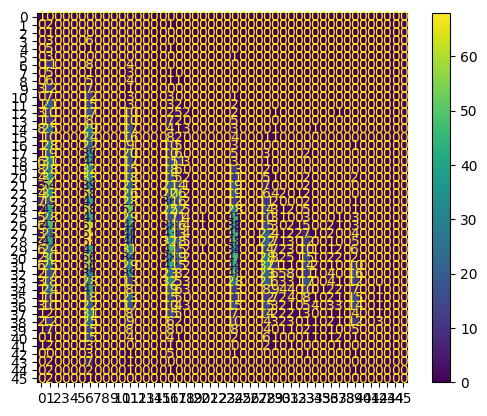

In [33]:
nuevo_dataset_sin_NAN = renglones_Nan

        #'Title', , 'Reviews' , 'Lists' 'Plays', 'Playing',
X = nuevo_dataset_sin_NAN[[ 'Backlogs', 'Wishlist']]

print (X.head())

#y = nuevo_dataset_sin_NAN['Rating']
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(nuevo_dataset_sin_NAN['Rating'])
print(y_transformed)

X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=16)

# test_size=0.2 significa que el 20% de los datos se utilizará para prueba, y el 80% para entrenamiento
# random_state se utiliza para garantizar la reproducibilidad de los resultados

# Mostrar las dimensiones de los conjuntos de datos resultantes
print("Dimensiones de X_train:", X_train.shape) #(616, 8) el 8 son los numeros de etiquetas, en este caso son los numeros de columnas que se pusieron arriba
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape) #este es el numero de etiquetas
print("Dimensiones de y_test:", y_test.shape)


naive_bayes = GaussianNB()

#Entrenamos
naive_bayes.fit(X_train, y_train)

#Predecimos
prediccion = naive_bayes.predict(X_test)

accuray = accuracy_score(prediccion, y_test)
f1 = f1_score(prediccion, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

labels = ["Outcome", "Not Outcome"]
cm = confusion_matrix(y_test, prediccion)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();